In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.learning_curve import learning_curve
from sklearn import cross_validation
from sklearn.ensemble import BaggingRegressor
import warnings
warnings.filterwarnings('ignore')


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [2]:
train=pd.read_csv("C:\\Users\\CDA\\Desktop\\train.csv")
test=pd.read_csv("C:\\Users\\CDA\\Desktop\\test.csv")

In [3]:
#数值型数据分布
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
#离散型数据分布
train.describe(include=[np.object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Taussig, Miss. Ruth",male,1601,G6,S
freq,1,577,7,4,644


In [5]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Taussig, Miss. Ruth",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
#了解各数据的相关性
train_corr=train.drop("PassengerId",axis=1).corr()
train_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


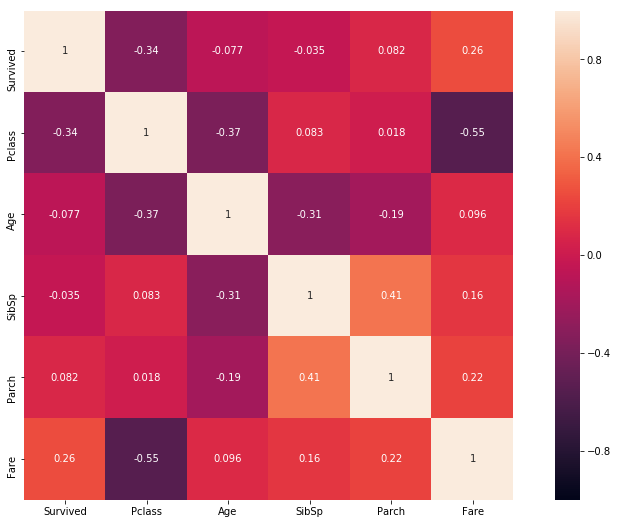

In [9]:
# 画出相关性热力图
%matplotlib inline
a = plt.subplots(figsize=(15,9))#调整画布大小
a = sns.heatmap(train_corr, vmin=-1, vmax=1 , annot=True , square=True)#画热力图
a

离散型特征与survived之间的关系

In [10]:
train[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).mean()  #as_index是无索引，即除去用来groupby的索引

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [11]:
#train.groupby(['Pclass'])['Pclass','Survived'].mean()

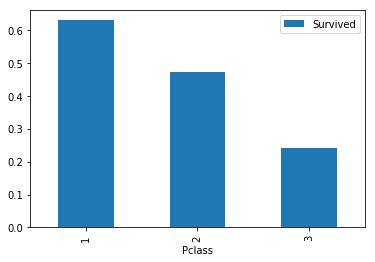

In [12]:
train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()

In [13]:
train[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


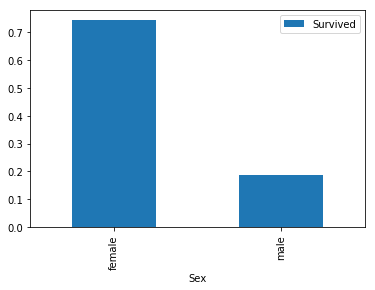

In [14]:
train[["Sex","Survived"]].groupby(["Sex"]).mean().plot.bar()

In [15]:
train[["SibSp","Survived"]].groupby(["SibSp"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


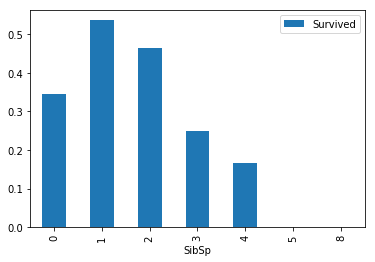

In [16]:
train[["SibSp","Survived"]].groupby(["SibSp"]).mean().plot.bar()

In [17]:
train[["Parch","Survived"]].groupby(["Parch"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


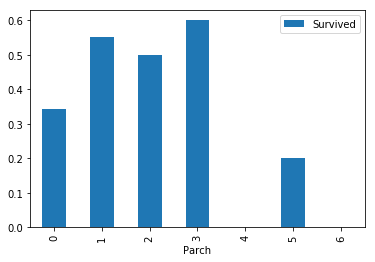

In [18]:
train[["Parch","Survived"]].groupby(["Parch"]).mean().plot.bar()

In [19]:
train[["Embarked","Survived"]].groupby(["Embarked"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


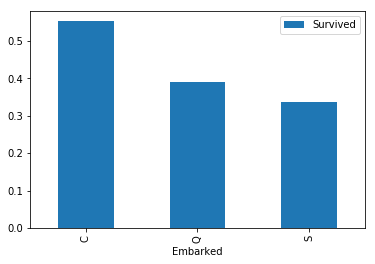

In [20]:
train[["Embarked","Survived"]].groupby(["Embarked"]).mean().plot.bar()

连续型特征与survived之间的关系

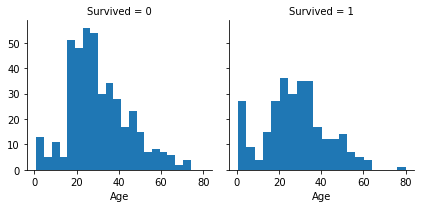

In [21]:
#年龄age
grid = sns.FacetGrid(train, col='Survived') #加上col可以使图形水平排列
grid.map(plt.hist, 'Age', bins=20)
plt.show()

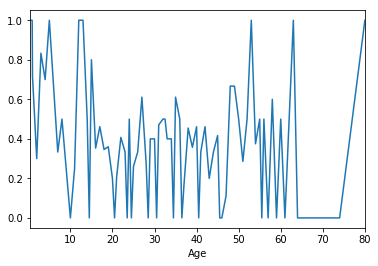

In [22]:
train.groupby("Age")["Survived"].mean().plot()

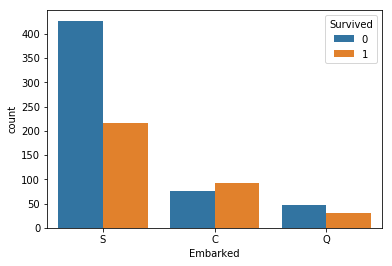

In [23]:
#出发的港口Embarked
sns.countplot('Embarked',hue='Survived',data=train)

In [24]:
#再图形中显示中文
from pyplotz.pyplotz import PyplotZ
pltz=PyplotZ()
pltz.enable_chinese()

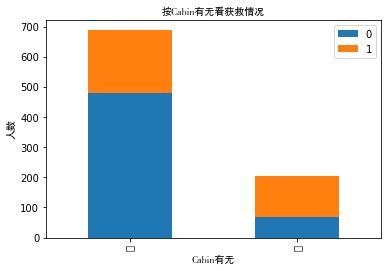

In [25]:
fig = plt.figure()
fig.set(alpha=0.2)
Survived_cabin = train.Survived[pd.notnull(train.Cabin)].value_counts()
Survived_nocabin = train.Survived[pd.isnull(train.Cabin)].value_counts()
df=pd.DataFrame({u'有':Survived_cabin, u'无':Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
pltz.title("按Cabin有无看获救情况")
pltz.xlabel("Cabin有无") 
pltz.ylabel("人数")
pltz.show()

In [26]:
#先将数据集合并,一起做特征工程(注意,标准化的时候需要分开处理)
#先将test补齐,然后通过pd.apped()合并
test['Survived'] = 0
train_test = train.append(test)

In [27]:
train_test.shape

(1309, 12)

In [28]:
#对乘客等级做分列处理（转化成哑变量）
train_test = pd.get_dummies(train_test,columns=['Pclass'])

In [29]:
#对性别做分列
train_test = pd.get_dummies(train_test,columns=["Sex"])

In [30]:
#对亲戚情况做分列
train_test['SibSp_Parch'] = train_test['SibSp'] + train_test['Parch']
train_test = pd.get_dummies(train_test,columns = ['SibSp','Parch','SibSp_Parch']) 

In [31]:
train_test.shape

(1309, 37)

In [32]:
#对出发港口做分列
train_test = pd.get_dummies(train_test,columns=["Embarked"])

In [33]:
train_test['Name1'] = train_test['Name'].str.extract('.+,(.+)', expand=False).str.extract('^(.+?)\.', expand=False).str.strip()

In [34]:
train_test['Name1']

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
5          Mr
6          Mr
7      Master
8         Mrs
9         Mrs
10       Miss
11       Miss
12         Mr
13         Mr
14       Miss
15        Mrs
16     Master
17         Mr
18        Mrs
19        Mrs
20         Mr
21         Mr
22       Miss
23         Mr
24       Miss
25        Mrs
26         Mr
27         Mr
28       Miss
29         Mr
        ...  
388        Mr
389    Master
390        Mr
391       Mrs
392    Master
393        Mr
394        Mr
395       Mrs
396        Mr
397       Mrs
398        Mr
399        Mr
400      Miss
401        Mr
402      Miss
403        Mr
404        Mr
405        Mr
406        Mr
407        Mr
408      Miss
409      Miss
410      Miss
411       Mrs
412      Miss
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Name1, Length: 1309, dtype: object

In [35]:
#将姓名分类处理()
train_test['Name1'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer' , inplace = True)
train_test['Name1'].replace(['Jonkheer', 'Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty' , inplace = True)
train_test['Name1'].replace(['Mme', 'Ms', 'Mrs'], 'Mrs')
train_test['Name1'].replace(['Mlle', 'Miss'], 'Miss')
train_test['Name1'].replace(['Mr'], 'Mr' , inplace = True)
train_test['Name1'].replace(['Master'], 'Master' , inplace = True)

In [36]:
#分列处理
train_test = pd.get_dummies(train_test,columns=['Name1'])

In [37]:
#从姓名中提取出姓
train_test['Name2'] = train_test['Name'].apply(lambda x: x.split('.')[1])

In [38]:
train_test['Name2']

0                                       Owen Harris
1             John Bradley (Florence Briggs Thayer)
2                                             Laina
3                     Jacques Heath (Lily May Peel)
4                                     William Henry
5                                             James
6                                         Timothy J
7                                     Gosta Leonard
8               Oscar W (Elisabeth Vilhelmina Berg)
9                            Nicholas (Adele Achem)
10                                   Marguerite Rut
11                                        Elizabeth
12                                    William Henry
13                                     Anders Johan
14                            Hulda Amanda Adolfina
15                               (Mary D Kingcome) 
16                                           Eugene
17                                   Charles Eugene
18              Julius (Emelia Maria Vandemoortele)
19          

In [39]:
#计算数量,然后合并数据集
Name2_sum = train_test['Name2'].value_counts().reset_index()

In [40]:
Name2_sum

,index,Name2
0,John,15
1,William,11
2,Patrick,10
3,James,9
4,Joseph,7
5,Mary,7
6,Ivan,6
7,William Henry,6
8,Kate,5
9,Harry,5


In [41]:
Name2_sum.columns=['Name2','Name2_sum'] #自改列名

In [42]:
Name2_sum

,Name2,Name2_sum
0,John,15
1,William,11
2,Patrick,10
3,James,9
4,Joseph,7
5,Mary,7
6,Ivan,6
7,William Henry,6
8,Kate,5
9,Harry,5


In [43]:
train_test = pd.merge(train_test,Name2_sum,how='left',on='Name2')

In [44]:
train_test

,Age,Cabin,Fare,Name,PassengerId,Survived,Ticket,Pclass_1,Pclass_2,Pclass_3,...,Name1_Miss,Name1_Mlle,Name1_Mme,Name1_Mr,Name1_Mrs,Name1_Ms,Name1_Officer,Name1_Royalty,Name2,Name2_sum
0,22.0,NaN,7.2500,"Braund, Mr. Owen Harris",1,0,A/5 21171,0,0,1,...,0,0,0,1,0,0,0,0,Owen Harris,1
1,38.0,C85,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,PC 17599,1,0,0,...,0,0,0,0,1,0,0,0,John Bradley (Florence Briggs Thayer),1
2,26.0,NaN,7.9250,"Heikkinen, Miss. Laina",3,1,STON/O2. 3101282,0,0,1,...,1,0,0,0,0,0,0,0,Laina,1
3,35.0,C123,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,113803,1,0,0,...,0,0,0,0,1,0,0,0,Jacques Heath (Lily May Peel),1
4,35.0,NaN,8.0500,"Allen, Mr. William Henry",5,0,373450,0,0,1,...,0,0,0,1,0,0,0,0,William Henry,6
5,NaN,NaN,8.4583,"Moran, Mr. James",6,0,330877,0,0,1,...,0,0,0,1,0,0,0,0,James,9
6,54.0,E46,51.8625,"McCarthy, Mr. Timothy J",7,0,17463,1,0,0,...,0,0,0,1,0,0,0,0,Timothy J,1
7,2.0,NaN,21.0750,"Palsson, Master. Gosta Leonard",8,0,349909,0,0,1,...,0,0,0,0,0,0,0,0,Gosta Leonard,1
8,27.0,NaN,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",9,1,347742,0,0,1,...,0,0,0,0,1,0,0,0,Oscar W (Elisabeth Vilhelmina Berg),1
9,14.0,NaN,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",10,1,237736,0,1,0,...,0,0,0,0,1,0,0,0,Nicholas (Adele Achem),1


In [45]:
#由于出现一次时该特征时无效特征,用one来代替出现一次的姓
train_test.loc[train_test['Name2_sum'] == 1 , 'Name2_new'] = 'one'
train_test.loc[train_test['Name2_sum'] > 1 , 'Name2_new'] = train_test['Name2']
del train_test['Name2']

In [46]:
train_test

,Age,Cabin,Fare,Name,PassengerId,Survived,Ticket,Pclass_1,Pclass_2,Pclass_3,...,Name1_Miss,Name1_Mlle,Name1_Mme,Name1_Mr,Name1_Mrs,Name1_Ms,Name1_Officer,Name1_Royalty,Name2_sum,Name2_new
0,22.0,NaN,7.2500,"Braund, Mr. Owen Harris",1,0,A/5 21171,0,0,1,...,0,0,0,1,0,0,0,0,1,one
1,38.0,C85,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,PC 17599,1,0,0,...,0,0,0,0,1,0,0,0,1,one
2,26.0,NaN,7.9250,"Heikkinen, Miss. Laina",3,1,STON/O2. 3101282,0,0,1,...,1,0,0,0,0,0,0,0,1,one
3,35.0,C123,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,113803,1,0,0,...,0,0,0,0,1,0,0,0,1,one
4,35.0,NaN,8.0500,"Allen, Mr. William Henry",5,0,373450,0,0,1,...,0,0,0,1,0,0,0,0,6,William Henry
5,NaN,NaN,8.4583,"Moran, Mr. James",6,0,330877,0,0,1,...,0,0,0,1,0,0,0,0,9,James
6,54.0,E46,51.8625,"McCarthy, Mr. Timothy J",7,0,17463,1,0,0,...,0,0,0,1,0,0,0,0,1,one
7,2.0,NaN,21.0750,"Palsson, Master. Gosta Leonard",8,0,349909,0,0,1,...,0,0,0,0,0,0,0,0,1,one
8,27.0,NaN,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",9,1,347742,0,0,1,...,0,0,0,0,1,0,0,0,1,one
9,14.0,NaN,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",10,1,237736,0,1,0,...,0,0,0,0,1,0,0,0,1,one


In [47]:
train_test=pd.get_dummies(train_test,columns=["Name2_new"])

In [48]:
del train_test["Name"]

In [49]:
train_test

,Age,Cabin,Fare,PassengerId,Survived,Ticket,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,Name2_new_ Thomas Henry,Name2_new_ Victor,Name2_new_ Washington,Name2_new_ William,Name2_new_ William Edward,Name2_new_ William Henry,Name2_new_ William James,Name2_new_ William John,Name2_new_ William Thomas,Name2_new_one
0,22.0,NaN,7.2500,1,0,A/5 21171,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,38.0,C85,71.2833,2,1,PC 17599,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,26.0,NaN,7.9250,3,1,STON/O2. 3101282,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
3,35.0,C123,53.1000,4,1,113803,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,35.0,NaN,8.0500,5,0,373450,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
5,NaN,NaN,8.4583,6,0,330877,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,54.0,E46,51.8625,7,0,17463,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,2.0,NaN,21.0750,8,0,349909,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
8,27.0,NaN,11.1333,9,1,347742,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
9,14.0,NaN,30.0708,10,1,237736,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1


In [50]:
#从上面的分析,发现该特征train集无miss值,test有一个缺失值,先查看
train_test.loc[train_test["Fare"].isnull()]

,Age,Cabin,Fare,PassengerId,Survived,Ticket,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,Name2_new_ Thomas Henry,Name2_new_ Victor,Name2_new_ Washington,Name2_new_ William,Name2_new_ William Edward,Name2_new_ William Henry,Name2_new_ William James,Name2_new_ William John,Name2_new_ William Thomas,Name2_new_one
1043,60.5,NaN,NaN,1044,0,3701,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
#票价与pclass和Embarked有关,所以用train分组后的平均数填充
train.groupby(by=["Pclass","Embarked"]).Fare.mean()

Pclass  Embarked
1       C           104.718529
        Q            90.000000
        S            70.364862
2       C            25.358335
        Q            12.350000
        S            20.327439
3       C            11.214083
        Q            11.183393
        S            14.644083
Name: Fare, dtype: float64

In [52]:
#用pclass=3和Embarked=S的平均数14.644083来填充
train_test["Fare"].fillna(14.435422,inplace=True)

In [53]:
#将Ticket提取字符列
#str.isnumeric()  如果S中只有数字字符，则返回True，否则返回False
train_test['Ticket_Letter'] = train_test['Ticket'].str.split().str[0]
train_test['Ticket_Letter'] = train_test['Ticket_Letter'].apply(lambda x:np.nan if x.isnumeric() else x)
train_test.drop('Ticket',inplace=True,axis=1)

In [54]:
#分列,此时nan值可以不做处理
train_test = pd.get_dummies(train_test,columns=['Ticket_Letter'],drop_first=True)

In [55]:
train_test

,Age,Cabin,Fare,PassengerId,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,...,Ticket_Letter_SOTON/O2,Ticket_Letter_SOTON/OQ,Ticket_Letter_STON/O,Ticket_Letter_STON/O2.,Ticket_Letter_STON/OQ.,Ticket_Letter_SW/PP,Ticket_Letter_W./C.,Ticket_Letter_W.E.P.,Ticket_Letter_W/C,Ticket_Letter_WE/P
0,22.0,NaN,7.2500,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,38.0,C85,71.2833,2,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,26.0,NaN,7.9250,3,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
3,35.0,C123,53.1000,4,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,35.0,NaN,8.0500,5,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5,NaN,NaN,8.4583,6,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
6,54.0,E46,51.8625,7,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,2.0,NaN,21.0750,8,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
8,27.0,NaN,11.1333,9,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
9,14.0,NaN,30.0708,10,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
train_test.loc[train_test["Age"].isnull()]['Survived'].mean()

0.19771863117870722

In [57]:
# 所以用年龄是否缺失值来构造新特征
train_test.loc[train_test["Age"].isnull() ,"age_nan"] = 1
train_test.loc[train_test["Age"].notnull() ,"age_nan"] = 0
train_test = pd.get_dummies(train_test,columns=['age_nan'])

In [58]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Columns: 187 entries, Age to age_nan_1.0
dtypes: float64(2), int64(3), object(1), uint8(181)
memory usage: 343.0+ KB


In [59]:
#创建没有['Age','Survived']的数据集
missing_age = train_test.drop(['Survived','Cabin'],axis=1)
#将Age完整的项作为训练集、将Age缺失的项作为测试集。
missing_age_train = missing_age[missing_age['Age'].notnull()]
missing_age_test = missing_age[missing_age['Age'].isnull()]

In [60]:
#构建训练集合预测集的X和Y值
missing_age_X_train = missing_age_train.drop(['Age'], axis=1)
missing_age_Y_train = missing_age_train['Age']
missing_age_X_test = missing_age_test.drop(['Age'], axis=1)

In [61]:
# 先将数据标准化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
#用测试集训练并标准化
ss.fit(missing_age_X_train)
missing_age_X_train = ss.transform(missing_age_X_train)
missing_age_X_test = ss.transform(missing_age_X_test)

In [62]:
#使用贝叶斯预测年龄
from sklearn import linear_model
lin = linear_model.BayesianRidge()
lin.fit(missing_age_X_train,missing_age_Y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [63]:
#将年龄划分是个阶段10以下,10-18,18-30,30-50,50以上
train_test['Age'] = pd.cut(train_test['Age'], bins=[0,10,18,30,50,100],labels=[1,2,3,4,5])
train_test = pd.get_dummies(train_test,columns=['Age'])

In [64]:
#cabin项缺失太多，只能将有无Cain首字母进行分类,缺失值为一类,作为特征值进行建模
train_test['Cabin_nan'] = train_test['Cabin'].apply(lambda x:str(x)[0] if pd.notnull(x) else x)
train_test = pd.get_dummies(train_test,columns=['Cabin_nan'])

In [65]:
#cabin项缺失太多，只能将有无Cain首字母进行分类,
train_test.loc[train_test["Cabin"].isnull() ,"Cabin_nan"] = 1
train_test.loc[train_test["Cabin"].notnull() ,"Cabin_nan"] = 0
train_test = pd.get_dummies(train_test,columns=['Cabin_nan'])
train_test.drop('Cabin',axis=1,inplace=True)

In [66]:
train_test.shape

(1309, 200)

In [67]:
#划分数据集
train_data = train_test[:891]
test_data = train_test[891:]
train_data_X = train_data.drop(['Survived'],axis=1)
train_data_Y = train_data['Survived']
test_data_X = test_data.drop(['Survived'],axis=1)

In [68]:
#对模型进行标准化
from sklearn.preprocessing import StandardScaler
ss2 = StandardScaler()
ss2.fit(train_data_X)
train_data_X_sd = ss2.transform(train_data_X)
test_data_X_sd = ss2.transform(test_data_X)

构建模型

In [69]:
#随机森林
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=150,min_samples_leaf=3,max_depth=6,oob_score=True)
rf.fit(train_data_X,train_data_Y)
test["Survived"] = rf.predict(test_data_X)
RF = test[['PassengerId','Survived']].set_index('PassengerId')
RF.to_csv('RF.csv')

In [70]:
from sklearn.externals import joblib
joblib.dump(rf, 'rf10.pkl')

['rf10.pkl']

In [71]:
#逻辑回归
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV

lr = LogisticRegression()
param = {'C':[0.001,0.01,0.1,1,10], "max_iter":[100,250]}
clf = GridSearchCV(lr, param,cv=5, n_jobs=-1, verbose=1, scoring="roc_auc")
clf.fit(train_data_X_sd, train_data_Y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   49.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'max_iter': [100, 250]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=1)

In [72]:
# 打印参数的得分情况
clf.grid_scores_
# 打印最佳参数
clf.best_params_

{'C': 0.01, 'max_iter': 100}

In [73]:
#将最佳参数传入训练模型
lr = LogisticRegression(clf.best_params_)
lr.fit(train_data_X_sd,train_data_Y)
#预测结果
lr.predict(test_data_X_sd)
#打印结果
test["Survived"] = lr.predict(test_data_X_sd)
LS = test[['PassengerId','Survived']].set_index('PassengerId')
#输出结果
LS.to_csv('LS5.csv')

TypeError: unhashable type: 'dict'

In [74]:
#svm
from sklearn import svm
svc = svm.SVC()

clf = GridSearchCV(svc,param,cv=5,n_jobs=-1,verbose=1,scoring="roc_auc")
clf.fit(train_data_X_sd,train_data_Y)

clf.best_params_

svc = svm.SVC(C=1,max_iter=250)

#训练模型并预测结果
svc.fit(train_data_X_sd,train_data_Y)
svc.predict(test_data_X_sd)

#打印结果
test["Survived"] = svc.predict(test_data_X_sd)
SVM = test[['PassengerId','Survived']].set_index('PassengerId')
SVM.to_csv('svm1.csv')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   51.7s finished
